In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data set to python environment

In [3]:
data=pd.read_excel(r'E:\blessy\ict\iris new.xls')

In [4]:
data.head() #displaying first 5 rows

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape  #displays the number of rows and columns

(150, 5)

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isna().sum() #checking null values

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
#finding the ditribution

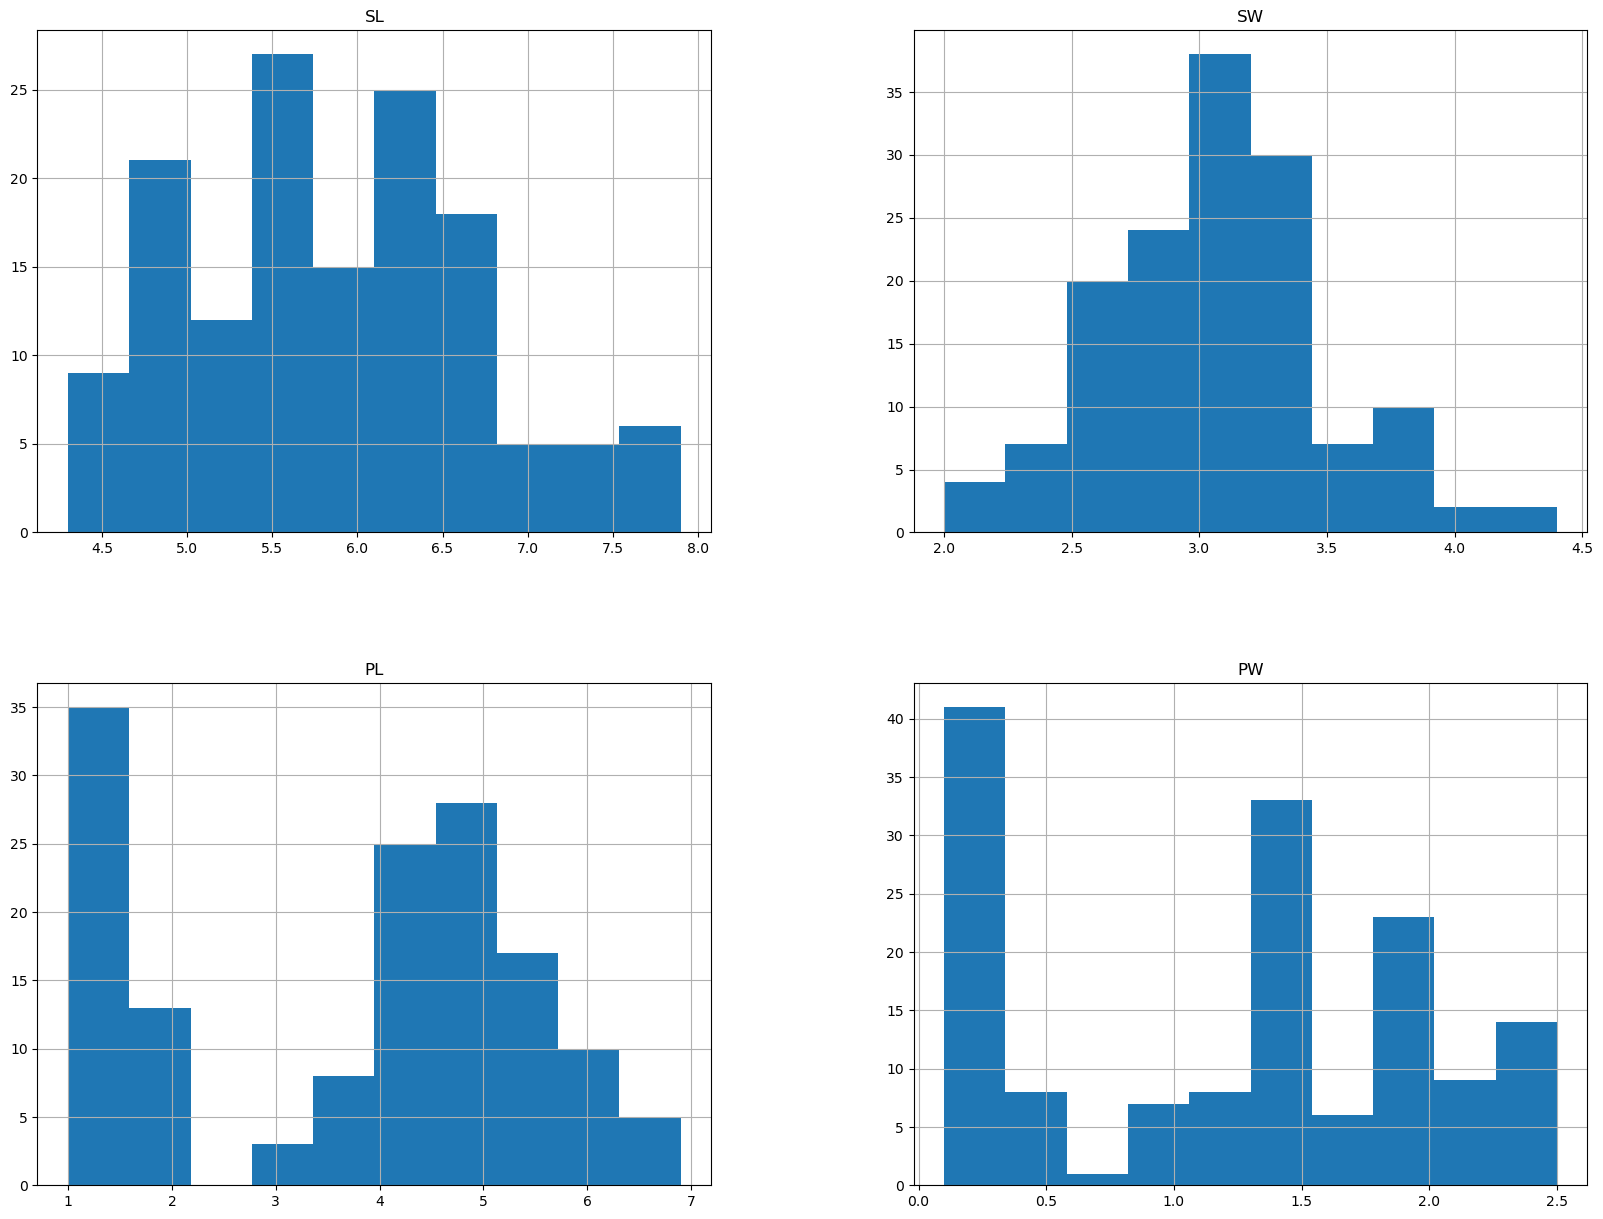

In [9]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [10]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
#filling missing values

In [12]:
for col in['SL', 'SW']:
    data[col]=data[col].fillna(data[col].mean())

In [13]:
data['PL']=data['PL'].fillna(data['PL'].median())

In [14]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [15]:
num_cols=['SL', 'SW', 'PL', 'PW']

In [16]:
#plotting numerical columns

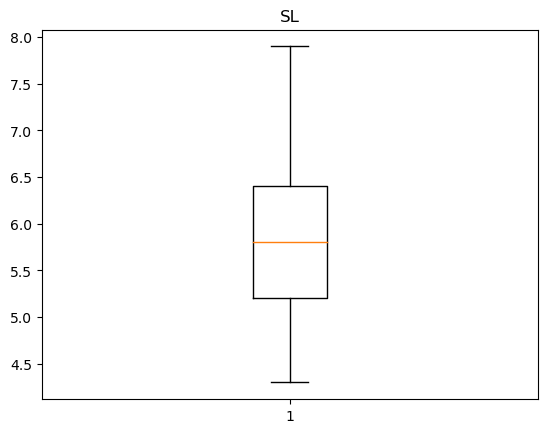

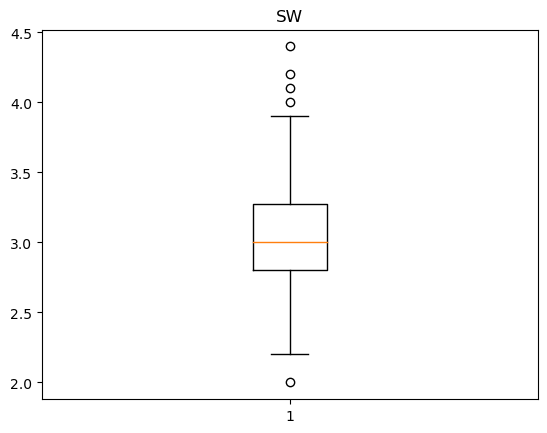

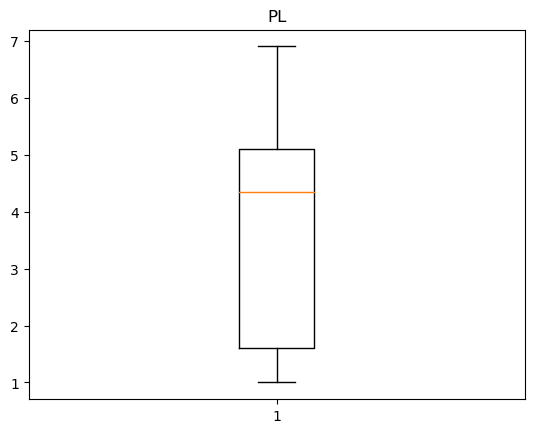

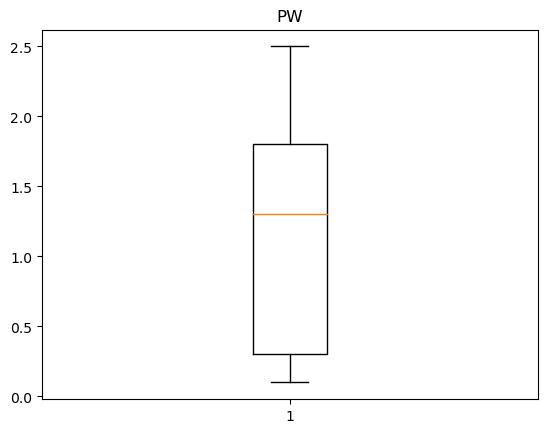

In [17]:
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [18]:
#finding q1,q2,q3

In [19]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17040\3273127858.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['SW'],25,interpolation='midpoint')
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17040\3273127858.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['SW'],50,interpolation='midpoint')
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17040\3273127858.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users

In [20]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [21]:
IQR=Q3-Q1

In [22]:
print(IQR)

0.4500000000000002


In [23]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR

In [24]:
print(up_lim)
print(low_lim)

3.9250000000000003
2.1249999999999996


In [25]:
outliers=[]
for x in data['SW']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)    

In [26]:
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [27]:
ind1=data['SW']>up_lim
dr=data.loc[ind1].index.tolist()
print(dr)

[14, 15, 32, 33]


In [28]:
data.drop([14, 15, 32, 33],inplace=True)

In [29]:
data.shape

(146, 5)

In [30]:
data1=pd.get_dummies(data) #one hot encoding

In [31]:
data1.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.100000,3.5,1.4,0.2,1,0,0
1,4.900000,3.0,1.4,0.2,1,0,0
2,5.855944,3.2,1.3,0.2,1,0,0
3,4.600000,3.1,1.5,0.2,1,0,0
4,5.000000,3.6,1.4,0.2,1,0,0


In [32]:
x=data.drop('Classification',axis=1)
y=data['Classification']

In [33]:
#min max scaling

In [34]:
from sklearn.preprocessing  import MinMaxScaler

In [35]:
min_max=MinMaxScaler()

In [36]:
x1=min_max.fit_transform(x)

In [37]:
type(x1)

numpy.ndarray

In [38]:
x1=pd.DataFrame(x1,columns=['SL','SW','PL','PW'])

In [39]:
x1.describe()

,SL,SW,PL,PW
count,146.000000,146.000000,146.000000,146.000000
mean,0.434535,0.536034,0.482238,0.468893
std,0.226958,0.201365,0.289253,0.314931
min,0.000000,0.000000,0.000000,0.000000
25%,0.229167,0.421053,0.101695,0.083333
50%,0.432207,0.526316,0.567797,0.500000
75%,0.583333,0.631579,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [40]:
#splitting data to features and target

In [41]:
x=data.drop('Classification',axis=1)
y=data['Classification']

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [43]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr = logit_model.predict(x_test)

C:\Users\BlessyMol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('precision = ',precision_score(y_test,y_pred_lr,average='weighted'))
print('Recall = ',recall_score(y_test,y_pred_lr,average='weighted'))
print('f1 score =',f1_score(y_test,y_pred_lr,average='weighted'))

Accuracy =  0.918918918918919
precision =  0.924924924924925
Recall =  0.918918918918919
f1 score = 0.920867736807016


In [45]:
confusion_matrix(y_test,y_pred_lr)

array([[15,  1,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]], dtype=int64)

# knn

In [46]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

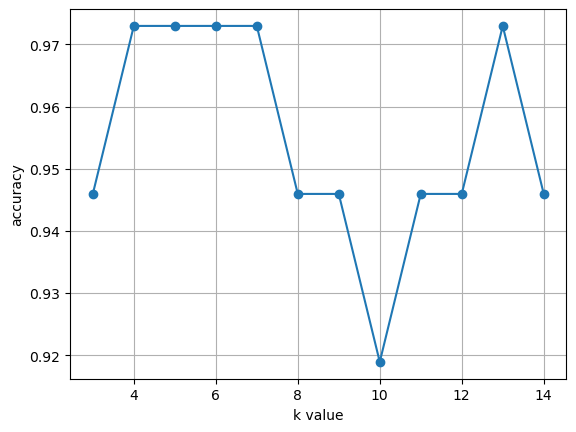

In [47]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [48]:
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_knn,))
print('precision = ',precision_score(y_test,y_pred_knn,average='weighted'))
print('Recall = ',recall_score(y_test,y_pred_knn,average='weighted'))
print('f1 score =',f1_score(y_test,y_pred_knn,average='weighted'))

Accuracy =  0.972972972972973
precision =  0.9759759759759761
Recall =  0.972972972972973
f1 score = 0.973331965741833


here KNN classification model is best because it gives more accuracy than linera model